In [20]:
import math
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [21]:
lem = WordNetLemmatizer() #create lemmatizer

In [22]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kseniapavlina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
dictionary = pd.read_csv('../data/processedDict.csv')
dictionary['word'] = dictionary['word'].apply(lambda x: lem.lemmatize(x, pos='n'))

In [24]:
dictionary

,word,cat_lev1,cat_lev2,cat_lev3,ndf
0,information,business,professional_conduct_host,advice,0.008904
1,recommendation,business,professional_conduct_host,advice,0.008375
2,tip,business,professional_conduct_host,advice,0.008399
3,advice,business,professional_conduct_host,advice,0.007568
4,suggestion,business,professional_conduct_host,advice,0.007580
...,...,...,...,...,...
347,talking,social,social_interaction,talking,0.001961
348,chatting,social,social_interaction,talking,0.001408
349,moment,social,social_interaction,talking,0.001155
350,chat,social,social_interaction,talking,0.000553


In [25]:
filepath = '../data/en_reviews/Manchester.csv'
reviews = pd.read_csv(filepath)

# reviews = reviews['date']
reviews

table = str.maketrans('', '', string.punctuation) #mapping to strip punctuation in review

#strip punct of each review -> lemmatise -> output is list of words so join into sentences
reviews['comments'] = reviews.comments.apply(lambda review: ' '.join(map(str, [lem.lemmatize(word.translate(table), pos='n') for word in review.lower().split()])))
reviews

reviews['date'] = pd.to_datetime(reviews['date'])

In [26]:
#### DELETE THIS LATER ###
mask = (reviews['date'] >= '2014-01-01') & (reviews['date'] < '2020-01-01')
reviews = reviews.loc[mask].copy()
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en
...,...,...,...,...,...,...,...,...
132232,143614,40944487,583880389,2019-12-29,317007245,Naoki,nice placeclean and tidy close to tram station...,en
132250,143634,40958538,581907582,2019-12-26,284016202,Fisher,pretty nice propertyit provided u a very good ...,en
132251,143635,40958538,583319985,2019-12-28,250172768,Joel,our entire experience with this stay wa unprof...,en
132253,143637,40996300,583843314,2019-12-29,86304424,Rafael,nice owner nice location good value,en


In [27]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en
...,...,...,...,...,...,...,...,...
132232,143614,40944487,583880389,2019-12-29,317007245,Naoki,nice placeclean and tidy close to tram station...,en
132250,143634,40958538,581907582,2019-12-26,284016202,Fisher,pretty nice propertyit provided u a very good ...,en
132251,143635,40958538,583319985,2019-12-28,250172768,Joel,our entire experience with this stay wa unprof...,en
132253,143637,40996300,583843314,2019-12-29,86304424,Rafael,nice owner nice location good value,en


In [28]:
def get_trends_nice(category, subcats):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    allwords = reviews['comments'].tolist()
    allwords = " ".join(allwords)
    unique_words = set(allwords.split(' '))
    len(unique_words)

    unique_words = list(unique_words)
    unique_words = [string for string in unique_words if string != ""]
#     len(unique_words)

    ls = []
    for word in unique_words:
        word = ''.join([i for i in word if not i.isdigit()])
        ls += [word]
    unique_words= ls
    unique_words = [string for string in unique_words if string != ""]
    unique_words = list(dict.fromkeys(unique_words))

    def countWords(word, review):
        count = 0
        for i in review:
            if i == word:
                count+=1
        return count

    def getDenom(review, unique_words):
        count = 0
        den = 0
        ls = []
        review = review.split()
        for word in review:
            kmp = countWords(word, review)
            if (kmp > 0 and word not in ls):
                ls += [word]
                den += math.log(1 + kmp)
        return den

    reviews['den'] = reviews['comments'].apply(lambda x: getDenom(x, unique_words))

    def getNom(category, review, dictionary, cat_levl="cat_lev1"):
        nom = 0
        review = review.split()
        dictionaryWords = dictionary[(dictionary[cat_levl] == category)]
        dictionaryWords = dictionaryWords['word']
        for word in dictionaryWords:
            nom += math.log(1 + review.count(word))
        return nom

    reviews['temp'] = reviews['comments'].apply(lambda x: getNom(category, x, dictionary))
    reviews[category] = reviews['temp']*100/reviews['den']

    k = {}
    for subcat in subcats:
        temp = reviews['comments'].apply(lambda x: getNom(subcat, x, dictionary, cat_levl="cat_lev3"))
        reviews[subcat] = temp * 100 / reviews["den"]
        k[subcat] = reviews[subcat].loc[reviews[subcat] > 0].min()
        
    print(k)
    
#     k_business= reviews[category].loc[reviews[category] > 0]
#     k_business = k_business.min()
#     print(k_business)

    def adoptionForSetOfReviews(category, setOfReviews, dictionary, startDate, endDate, k):
        adoption = 1
        mask = (setOfReviews['date'] >= startDate) & (setOfReviews['date'] < endDate)
        setOfReviews = setOfReviews.loc[mask]
        setOfReviews = setOfReviews[category]
        if (len(setOfReviews) == 0):
            return 0
        else:
            b = 1/len(setOfReviews)
            for review in setOfReviews:
                adoption *= math.pow((review + k),b)
            adoption = adoption - k
            return adoption

    d2 = {'year' : years, 'value':0.0}
    out = pd.DataFrame(data=d2)
    
    for i in range(len(years)):
        for subcat in subcats:
            out.at[i, "value_{}_{}".format(category, subcat)] = adoptionForSetOfReviews(subcat, reviews, dictionary, "{}-01-01".format(years[i]), "{}-01-01".format(years[i] + 1), k[subcat])

    return out

In [29]:
subcats = ["meal", "people", "personality_host", "talking", "sharing"]
soci = get_trends_nice("social", subcats)

{'meal': 0.26103746495305624, 'people': 0.2838709557660387, 'personality_host': 0.23074648557208602, 'talking': 0.23074648557208602, 'sharing': 0.23074648557208602}


In [30]:
a = pd.DataFrame(columns=["year", "subcat", "val"])

for subcat in subcats:
    ap = {"year": soci["year"], "val": soci["value_social_{}".format(subcat)]}
    ap = pd.DataFrame(data=ap)
    ap["subcat"] = subcat
    a = a.append(ap)
a

,subcat,val,year
0,meal,0.000000,2010
1,meal,0.000000,2011
2,meal,0.000000,2012
3,meal,0.000000,2013
4,meal,0.137738,2014
5,meal,0.102593,2015
6,meal,0.074090,2016
7,meal,0.047448,2017
8,meal,0.041704,2018
9,meal,0.033266,2019


In [31]:
pivot_social = a.pivot(index='year', columns='subcat', values='val')
pivot_social

subcat,meal,people,personality_host,sharing,talking
year,,,,,
2010,0.000000,0.000000,0.000000,0.000000,0.000000
2011,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.000000,0.000000,0.000000,0.000000,0.000000
2013,0.000000,0.000000,0.000000,0.000000,0.000000
2014,0.137738,0.787639,0.377458,0.065858,0.041008
2015,0.102593,0.660845,0.331879,0.069812,0.034708
2016,0.074090,0.481384,0.263351,0.048742,0.026996
2017,0.047448,0.286625,0.201568,0.027310,0.012982
2018,0.041704,0.238663,0.167346,0.023386,0.011017


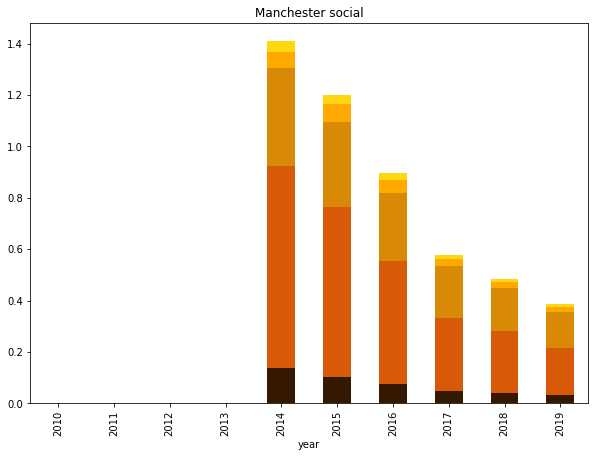

In [32]:
ax = pivot_social.loc[:,['meal','people', 'personality_host', 'sharing', 'talking']].plot.bar(stacked=True, figsize=(10,7), color=['#351800','#D85907','#D88A07','#FFA900','#FFD70F'])
plt.title("Manchester social")
ax.get_legend().remove()

In [33]:
subcats = ["advice", "personality_host2", "logistic", "location", 
           "property_type", "facilities", "interiors", "communication"]
busi = get_trends_nice("business", subcats)

{'advice': 0.21719385291080573, 'personality_host2': 0.21719385291080573, 'logistic': 0.23287170822818326, 'location': 0.4805193327389338, 'property_type': 0.2563181226180372, 'facilities': 0.2563181226180372, 'interiors': 0.36420561789903516, 'communication': 0.27857171233907196}


In [34]:
a = pd.DataFrame(columns=["year", "subcat", "val"])

for subcat in subcats:
    ap = {"year": busi["year"], "val": busi["value_business_{}".format(subcat)]}
    ap = pd.DataFrame(data=ap)
    ap["subcat"] = subcat
    a = a.append(ap)
a

,subcat,val,year
0,advice,0.000000,2010
1,advice,0.000000,2011
2,advice,0.000000,2012
3,advice,0.000000,2013
4,advice,0.078881,2014
...,...,...,...
5,communication,0.117358,2015
6,communication,0.144310,2016
7,communication,0.168619,2017
8,communication,0.193228,2018


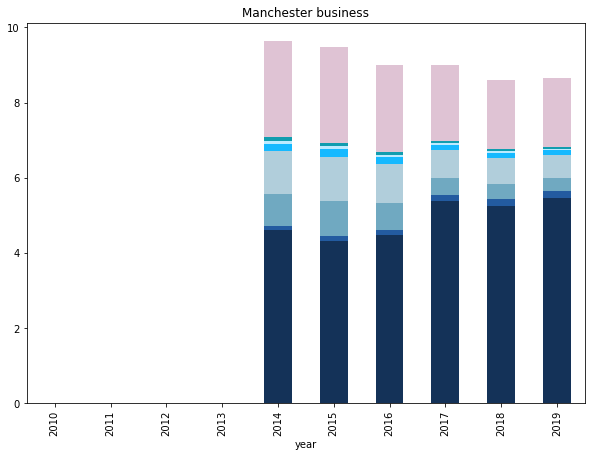

In [37]:
pivot_business = a.pivot(index='year', columns='subcat', values='val')
ax = pivot_business.loc[:,['location', 'communication', 'personality_host2', 'property_type', 'logistic', 'advice', 'facilities', 'interiors']].plot.bar(stacked=True, figsize=(10,7), color=['#143258','#235BA0','#70A9C1','#B1CEDB','#16B9FF','#BCEBFF','#119DAF', '#DFC3D4'])
plt.title("Manchester business")
ax.get_legend().remove()